In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage 

In [2]:
#Reading Image
img1 = cv.imread('1-1.webp')

#for better peresentation I converted to RGB 
img = cv.cvtColor(img1, cv.COLOR_BGR2RGB)


#Gray Scale
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

#Gussian Filter
img_gaussian = cv.GaussianBlur(gray,(3,3),0)

# 1.1 Roberts

(-0.5, 799.5, 532.5, -0.5)

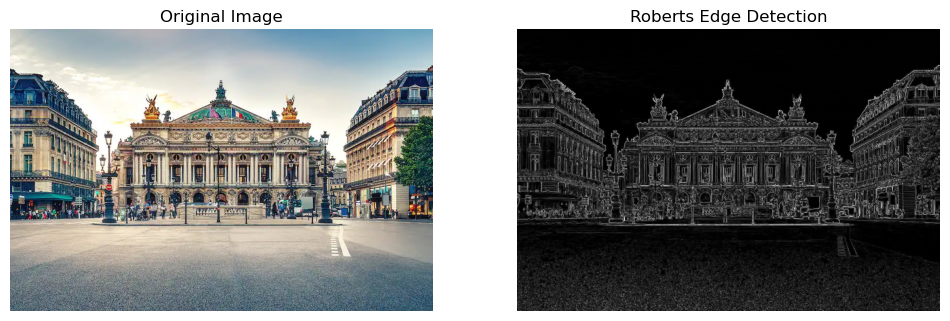

In [3]:
#Read the image in grayscale mode and convert the data type to float64
img2 = cv.imread("1-1.webp",0).astype('float64') 

img2/=255.0  #Normaliation --> Scale value between 0 and 1


#Define the Roberts cross filter for vertical and horizontal edges
roberts_cross_v = np.array( [[1, 0 ], 
                             [0,-1 ]] ) 

roberts_cross_h = np.array( [[ 0, 1 ], 
                             [ -1, 0 ]] ) 


#Apply the vertical and horizontal edge filter to the image
vertical = ndimage.convolve(img2,roberts_cross_v ) 
horizontal = ndimage.convolve( img2, roberts_cross_h ) 

#Combine the vertical and horizontal edges
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical)) 
edged_img*=255   #Rescale the edge-detected image to the range 0 to 255

# For Peresentation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Roberts Edge Detection')
plt.imshow(edged_img, cmap='gray')
plt.axis('off')

# 1.1 ‫‪Prewitt‬‬

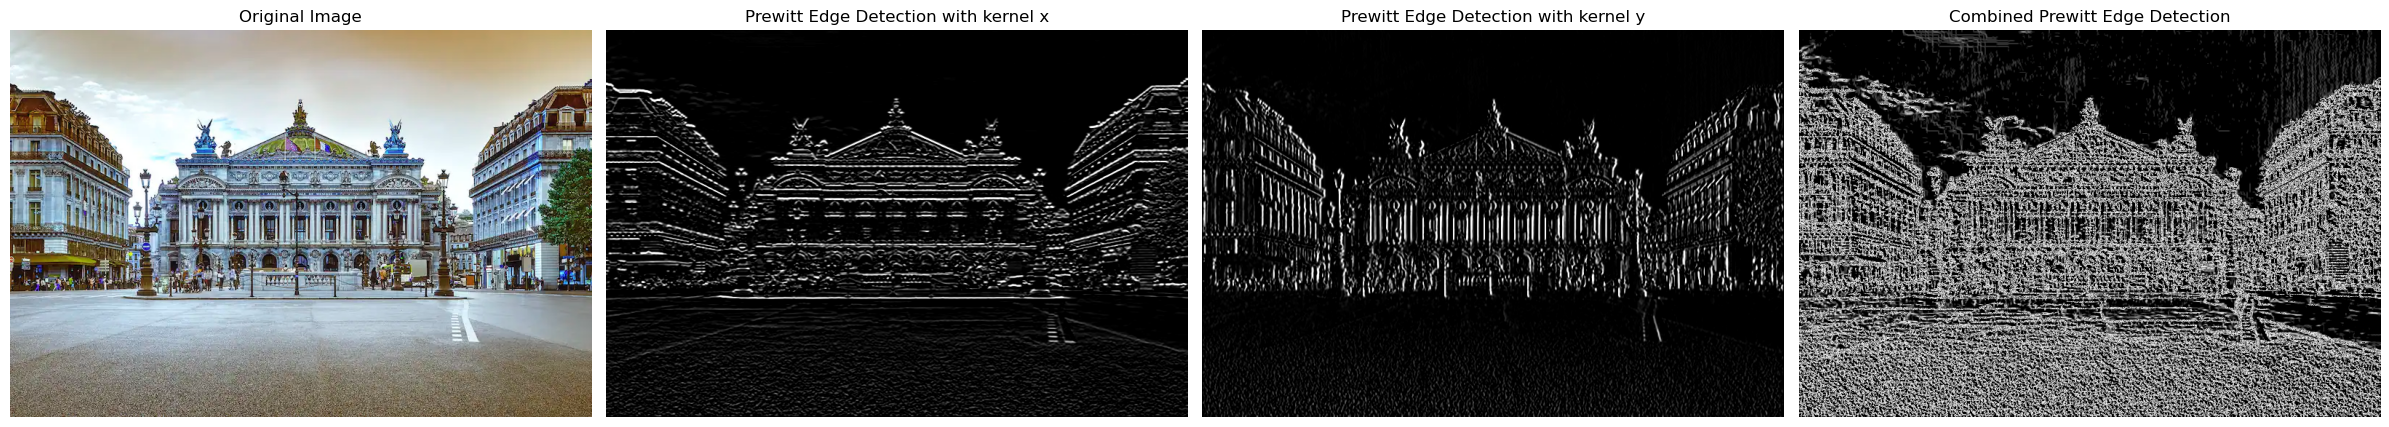

In [4]:
# Define the Prewitt kernel for x and Y direction
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

# Apply the Prewitt filter in the x and Y direction
img_prewittx = cv.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv.filter2D(img_gaussian, -1, kernely)


# Combine
edged_img = np.sqrt(np.square(img_prewittx) + np.square(img_prewitty))

# For Presentation
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Prewitt Edge Detection with kernel x')
plt.imshow(img_prewittx, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Prewitt Edge Detection with kernel y')
plt.imshow(img_prewitty, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Combined Prewitt Edge Detection')
plt.imshow(edged_img, cmap='gray')
plt.axis('off')

plt.tight_layout()  # Ensures plots are neatly arranged
plt.show()

# 1.1 Sobel 

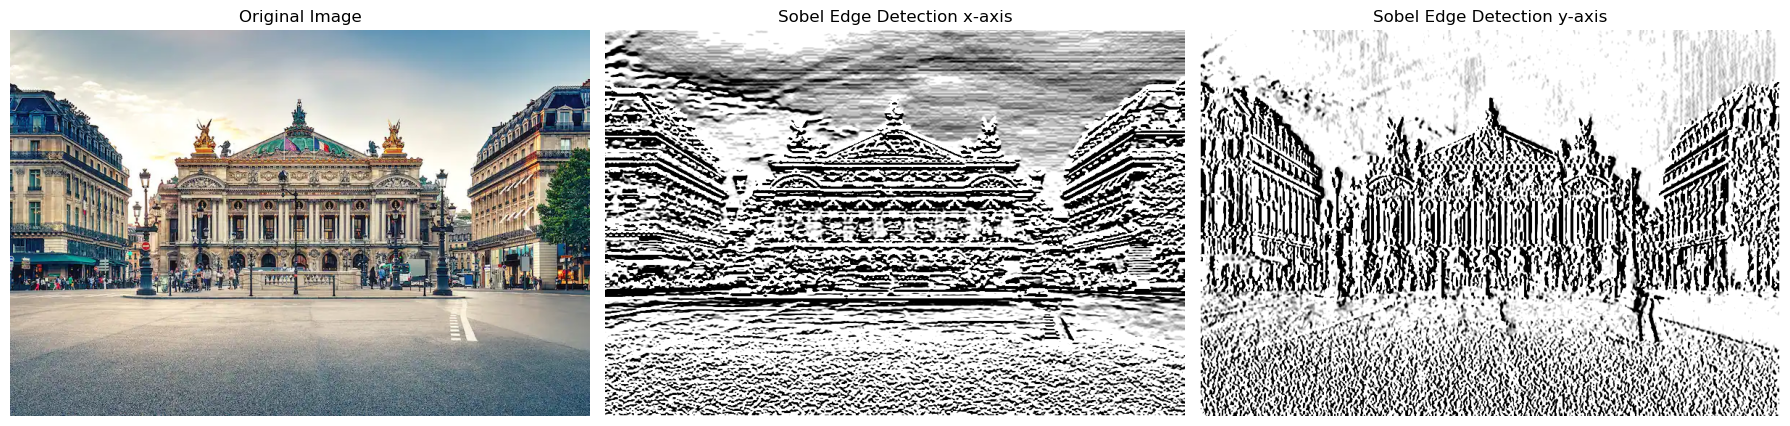

In [5]:
# Apply Sobel edge detection in the x and y directions
img_sobelx = cv.Sobel(img_gaussian, cv.CV_8U, 0, 1, ksize=5)
img_sobely = cv.Sobel(img_gaussian, cv.CV_8U, 1, 0, ksize=5)

# Invert the images to have edges white and background black
img_sobelx = 255 - img_sobelx
img_sobely = 255 - img_sobely


# For Presentation
plt.figure(figsize=(18, 6)) 

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Sobel Edge Detection x-axis')
plt.imshow(img_sobelx, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sobel Edge Detection y-axis')
plt.imshow(img_sobely, cmap='gray')
plt.axis('off')

plt.tight_layout()  
plt.show()

# 1.1 Laplacian

(-0.5, 799.5, 532.5, -0.5)

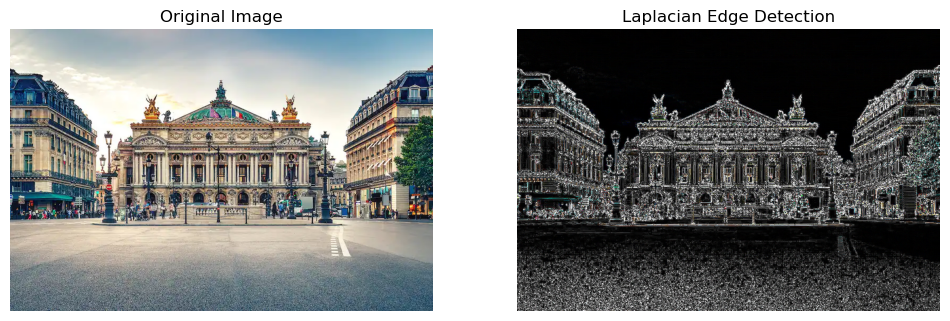

In [6]:
# Apply Laplacian edge detection
laplacian = cv.Laplacian(img, cv.CV_64F)
laplacian = cv.convertScaleAbs(laplacian)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian)
plt.axis('off')

# 1.1 Laplacian of Gaussian (LOG)

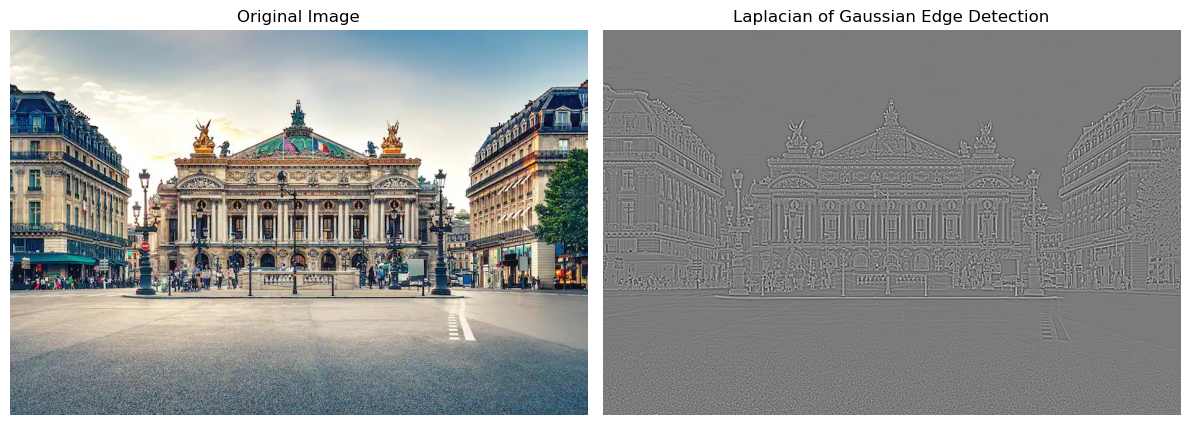

In [7]:
# Apply Laplacian of Gaussian edge detection
log_image = cv.Laplacian(img_gaussian, cv.CV_64F)

# Normalize the Laplacian output to be in the range [0, 255]
log_image = cv.normalize(log_image, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)

#For Display
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Laplacian of Gaussian Edge Detection')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# 1.2 Canny

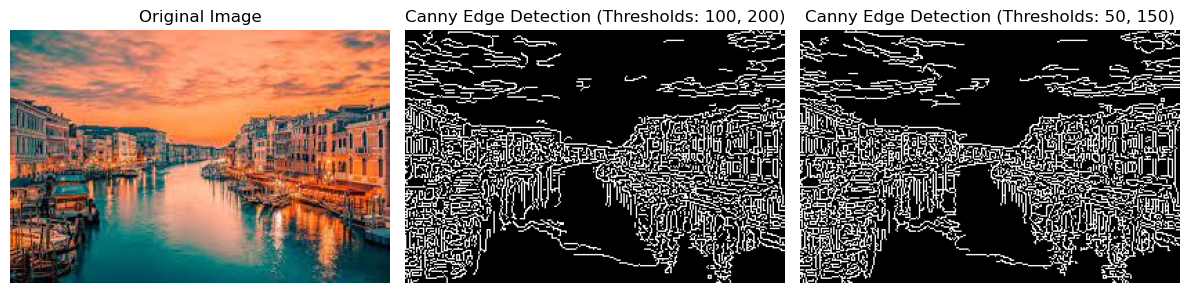

In [8]:
#Import image
img = cv.imread('1.2.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Convert image to grayscale

# Apply Canny edge detection
img_canny = cv.Canny(img_gray, 50, 150)  
img_canny2 = cv.Canny(img,100,200)
plt.figure(figsize=(12, 6))

#For Display
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Canny Edge Detection (Thresholds: 100, 200)')
plt.imshow(img_canny2, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Canny Edge Detection (Thresholds: 50, 150)')
plt.imshow(img_canny, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()